# SOCIOLOGIE DU BIG DATA
# TP 1

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import urllib.request

token = "EAACEdEose0cBADa3vFA8SeiS4YLZCrMVMSMNSzvqySTDjqM76IxcIvWFNd1HgOGpRicWzchku1JrOLP5hdJRfVXpiX1bYdVVutBb7gwLkdXpTv1zAO9omrGFfugYlgZCFa2ZBaQIWFPpZCZCIZCZAZAeaboFKktBXKPfZCNDraTrv5zI5pCiJe3yMdGMCJtYGfH0ZD"

## Distribution du type de posts sur les dernier 500 posts par rapport au 2015

In [2]:
def requestJSON(req):
    contents = urllib.request.urlopen(req)
    return json.load(contents)

def pageData(data, limit):
    if 'paging' in data:        
        nexturl = data['paging']['next']
        nextcontents = urllib.request.urlopen(nexturl)
        nextjson = json.load(nextcontents)
        data['data'].extend(nextjson['data'])
        if len(data) < limit:
            pageData(nextjson, limit)
    return data

In [3]:
req = "https://graph.facebook.com/v3.0/me/feed/?fields=message%2Cfrom%2Creactions%2Ctype%2Cstatus_type%2Clink%2Cstory&limit=500&access_token="+token
feed = requestJSON(req)
feed = pageData(feed, 500)

In [4]:
df = pd.DataFrame(data=feed['data'])

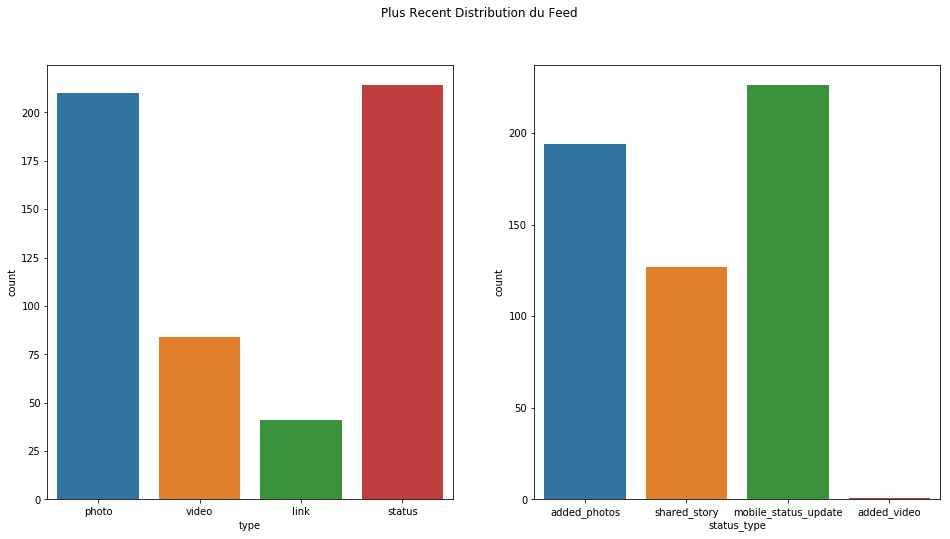

In [5]:
df = pd.DataFrame(data=feed['data'])
fig, ax = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle('Plus Recent Distribution du Feed')
sns.countplot(x='type', data=df, ax=ax[0])
sns.countplot(x='status_type', data=df, ax=ax[1])
plt.show()

In [6]:
reqOld = "https://graph.facebook.com/v3.0/me/feed/?fields=message%2Cfrom%2Creactions%2Ctype%2Cstatus_type%2Clink%2Cstory&until=01-01-2015&access_token="+token
feedOld = requestJSON(reqOld)
feedOld = pageData(feedOld, 500)

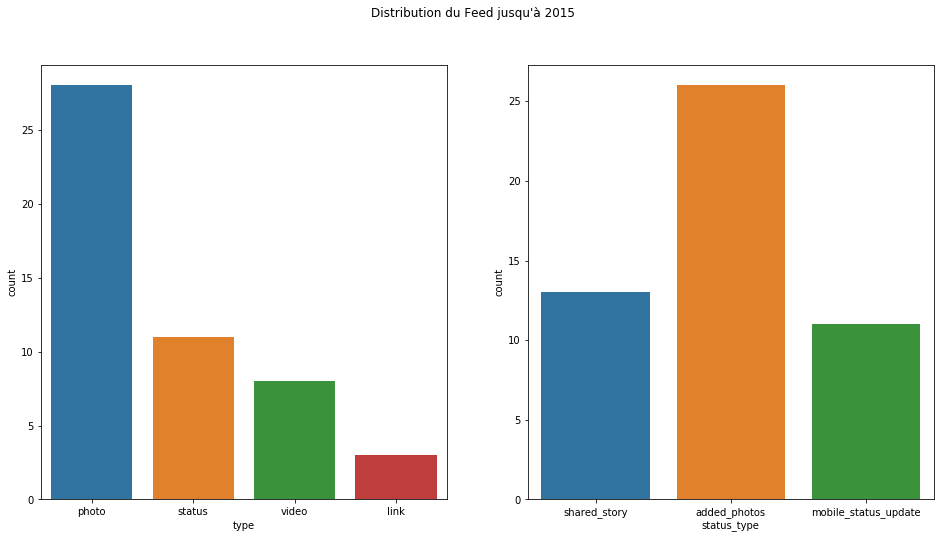

In [7]:
df_old = pd.DataFrame(data=feedOld['data'])
fig, ax = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle('Distribution du Feed jusqu\'à 2015')
sns.countplot(x='type', data=df_old, ax=ax[0])
sns.countplot(x='status_type', data=df_old, ax=ax[1])
plt.show()

## Changes in metadata:

In [8]:
oldpost_id = feed['data'][1]['id']
newpost_id = feed['data'][1]['id']

newreq = "https://graph.facebook.com/v3.0/"+oldpost_id+"?metadata=1&access_token="+token
oldreq = "https://graph.facebook.com/v3.0/"+newpost_id+"?metadata=1&access_token="+token

newmeta = requestJSON(newreq)
oldmeta = requestJSON(oldreq)

J'ai essayè de voir des changements dans les meta-donneès en comparant les metadonnèes de mon dernier post sur Facebook avec le premier du vieux 2015 feed. J'ai utilisè la requete suivant:

https://graph.facebook.com/v3.0/post_id?metadata=1&access_token=+token

Après, j'ai comparè les champs que j'ai trouvè dans les deux reponses JSON, mais toutes les deux semblent avoir les meme champs. Je devrais donc en deduire que les meta-donnèes n'ont pas changès depuis 2015, ce qui me semble assez improbable. 
Plus probablement, soit
- je n'ai pas compris la question
- les champs sont les memes parce qu'ils ont été ajouté dans un deuxieme temps aux vieux posts avec des valeurs nulls

## TP 2

In [9]:
feed = []
for line in open('st.jsons', 'r', encoding='utf8'):
    feed.append(json.loads(line))

### Observer les valeurs possibles du champ type, produire un histogramme de toute les valeurs

In [10]:
status_type = {}
for item in feed:
    for t in item['type']:
        if t in status_type:
            status_type[t] += 1
        else:
            status_type[t] = 1
print('Valeurs possibles du champ type:')
status_type

Valeurs possibles du champ type:


{'added_photos': 987,
 'added_video': 23,
 'app_created_story': 430,
 'approved_friend': 1269,
 'checkin': 20,
 'created_event': 1,
 'created_note': 5,
 'event': 11,
 'link': 2509,
 'mobile_status_update': 1226,
 'note': 1,
 'photo': 2035,
 'published_story': 77,
 'question': 18,
 'shared_story': 2035,
 'status': 9483,
 'swf': 37,
 'tagged_in_photo': 291,
 'video': 789,
 'wall_post': 1187}

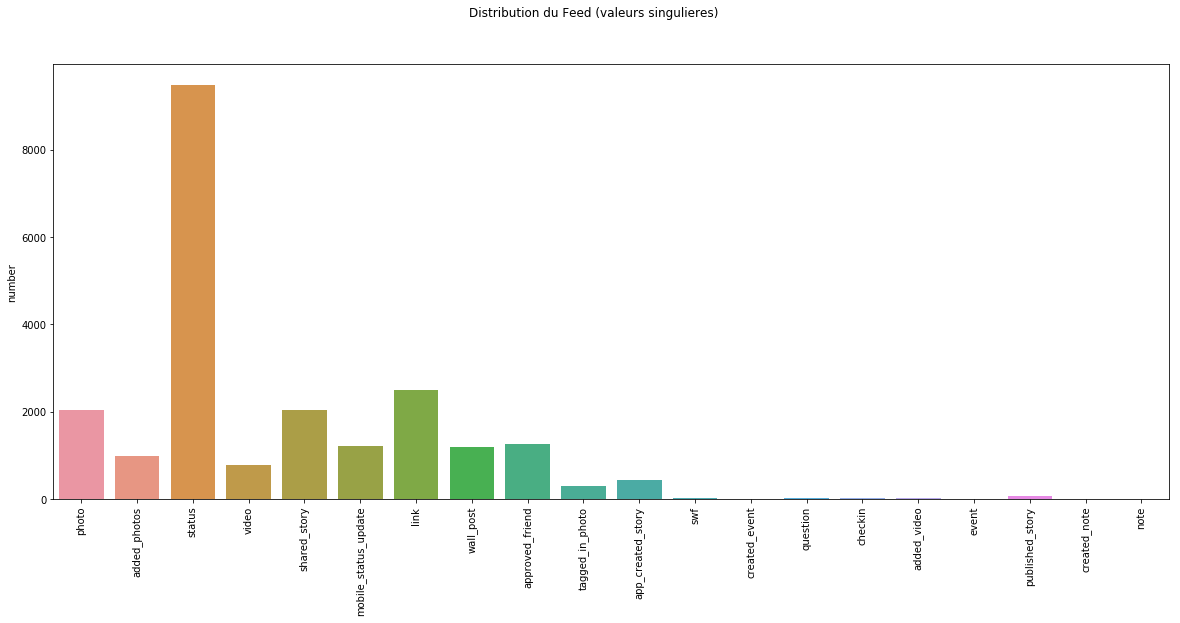

In [11]:
df = pd.DataFrame.from_dict(status_type, orient='index')
df.columns = ['number']
fig, ax = plt.subplots(figsize=(20,8))
fig.suptitle('Distribution du Feed (valeurs singulieres)')
sns.barplot(x=df.index.tolist(), y=df.number)
plt.xticks(rotation=90)
plt.show()

### Enumérer toutes les *combinaisons* de types de posts (puisqu'un post peut avoir plusieurs types)

In [12]:
status_type = {}
for item in feed:
        if " ".join(item['type']) in status_type:
            status_type[" ".join(item['type'])] += 1
        else:
            status_type[" ".join(item['type'])] = 1
print('Possibles combinaisons de types de posts:')
status_type

Possibles combinaisons de types de posts:


{'checkin': 20,
 'event shared_story': 11,
 'link': 1010,
 'link app_created_story': 310,
 'link approved_friend': 104,
 'link created_event': 1,
 'link created_note': 4,
 'link mobile_status_update': 1,
 'link published_story': 77,
 'link shared_story': 1002,
 'note shared_story': 1,
 'photo': 329,
 'photo added_photos': 987,
 'photo mobile_status_update': 44,
 'photo shared_story': 384,
 'photo tagged_in_photo': 291,
 'question': 18,
 'status': 5851,
 'status app_created_story': 82,
 'status approved_friend': 1165,
 'status created_note': 1,
 'status mobile_status_update': 1174,
 'status shared_story': 23,
 'status wall_post': 1187,
 'swf app_created_story': 37,
 'video': 144,
 'video added_video': 23,
 'video app_created_story': 1,
 'video mobile_status_update': 7,
 'video shared_story': 614}

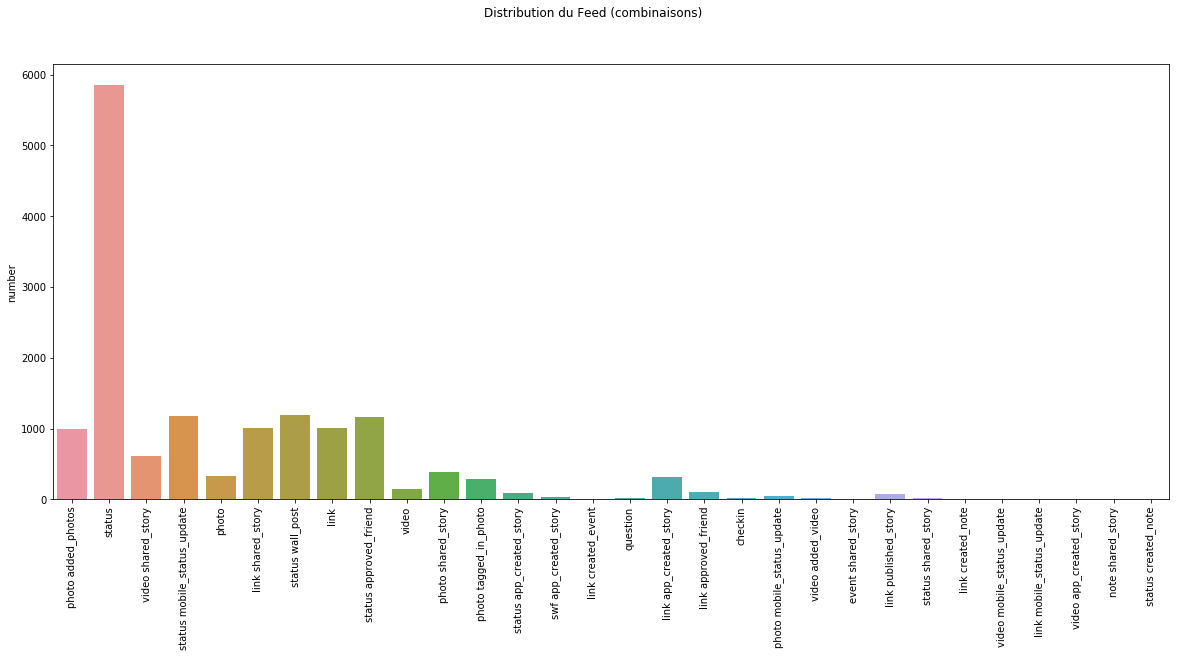

In [13]:
df = pd.DataFrame.from_dict(status_type, orient='index')
df.columns = ['number']
fig, ax = plt.subplots(figsize=(20,8))
fig.suptitle('Distribution du Feed (combinaisons)')
sns.barplot(x=df.index.tolist(), y=df.number)
plt.xticks(rotation=90)
plt.show()

### Tenter d'énumérer les valeurs possibles du champ type associées à un post contenant uniquement du texte (un "status update"), donc pas un lien. Déterminer si ces valeurs sont suffisantes pour caractériser cette catégorie de posts.

In [14]:
status_type = {}
for item in feed:
    if ('status' in ''.join(item['type'])) & ('link' not in item):
        if " ".join(item['type']) in status_type:
            status_type[" ".join(item['type'])] += 1
        else:
            status_type[" ".join(item['type'])] = 1
print('Valeurs possibles du champ type associées à posts contenants uniquement du texte:')
status_type

Valeurs possibles du champ type associées à posts contenants uniquement du texte:


{'status': 4578,
 'status approved_friend': 1165,
 'status created_note': 1,
 'status mobile_status_update': 12,
 'status shared_story': 22,
 'status wall_post': 776}

### Vérifier que le type "approved_friend" ne caractérise pas tous les posts annonçant l'apparition de nouveaux amis.

In [15]:
feed
res = []
for item in feed:
    if 'story' in item:
        if ('amis' in item['story']) & ('approved_friend' not in item['type']):
            res.append(item)

print('Premiers trois posts (parmi ' +str(len(res)) +') contenants le mots \'amis\' et sans \'approved_friend\' field:')
res[:3]

Premiers trois posts (parmi 194) contenants le mots 'amis' et sans 'approved_friend' field:


[{'created': 1322501341000,
  'from': {'id': '0017a9594e0e1a68c22c632550aaea69'},
  'id': 'f02ee68920dcd4add2af6a91174488d3a18f267a3856962a3a96daa2840707f3',
  'story': ' 0017a959 et fe99a0c1 sont désormais amis.',
  'story_tags': [[{'id': '0017a9594e0e1a68c22c632550aaea69', 'type': 'user'}],
   [{'id': 'fe99a0c1421df2136808d6332e19bf05', 'type': 'user'}]],
  'tags': [{'id': 'fe99a0c1421df2136808d6332e19bf05'}],
  'type': ['status'],
  'updated': 1322501341000},
 {'created': 1409645855000,
  'from': {'id': '0049d6104cc1da557f73158bbfd81438'},
  'id': 'd9cdbaf302f8866125375749720ca237',
  'story': ' 0049d610 et 64194d1b sont désormais amis.',
  'story_tags': [[{'id': '64194d1b36a5a3c0a8379a48b9f3dc85', 'type': 'user'}],
   [{'id': '0049d6104cc1da557f73158bbfd81438', 'type': 'user'}]],
  'tags': [{'id': '64194d1b36a5a3c0a8379a48b9f3dc85'}],
  'type': ['status'],
  'updated': 1409645855000},
 {'created': 1397400235000,
  'from': {'id': '01169d52ede20c61d17c940a7437fb6a'},
  'id': '1785d79